# Importing the libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

#set to display all the columns in datset

pd.set_option("display.max_columns",None)

# importing dataset

In [2]:
Aodata = pd.read_csv('adult_data.csv')
Aodata_BK1 = Aodata.copy()
Aodata.head()

,x,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# dataset information

In [3]:
Aodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   x                48842 non-null  int64 
 1   age              48842 non-null  int64 
 2   workclass        48842 non-null  object
 3   fnlwgt           48842 non-null  int64 
 4   education        48842 non-null  object
 5   educational-num  48842 non-null  int64 
 6   marital-status   48842 non-null  object
 7   occupation       48842 non-null  object
 8   relationship     48842 non-null  object
 9   race             48842 non-null  object
 10  gender           48842 non-null  object
 11  capital-gain     48842 non-null  int64 
 12  capital-loss     48842 non-null  int64 
 13  hours-per-week   48842 non-null  int64 
 14  native-country   48842 non-null  object
 15  income           48842 non-null  object
dtypes: int64(7), object(9)
memory usage: 6.0+ MB


# cleaning dataset

In [4]:
Aodata_dup=Aodata[Aodata.duplicated(keep='last')]
Aodata_dup

,x,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [5]:
Aodata.isnull().sum()

x                  0
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
Aodata.nunique()

x                  48842
age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [7]:
Aodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   x                48842 non-null  int64 
 1   age              48842 non-null  int64 
 2   workclass        48842 non-null  object
 3   fnlwgt           48842 non-null  int64 
 4   education        48842 non-null  object
 5   educational-num  48842 non-null  int64 
 6   marital-status   48842 non-null  object
 7   occupation       48842 non-null  object
 8   relationship     48842 non-null  object
 9   race             48842 non-null  object
 10  gender           48842 non-null  object
 11  capital-gain     48842 non-null  int64 
 12  capital-loss     48842 non-null  int64 
 13  hours-per-week   48842 non-null  int64 
 14  native-country   48842 non-null  object
 15  income           48842 non-null  object
dtypes: int64(7), object(9)
memory usage: 6.0+ MB


In [8]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Aodata['workclass']=LE.fit_transform(Aodata['workclass'])
Aodata['education']=LE.fit_transform(Aodata['education'])
Aodata['marital-status']=LE.fit_transform(Aodata['marital-status'])
Aodata['occupation']=LE.fit_transform(Aodata['occupation'])
Aodata['relationship']=LE.fit_transform(Aodata['relationship'])
Aodata['race']=LE.fit_transform(Aodata['race'])
Aodata['gender']=LE.fit_transform(Aodata['gender'])
Aodata['native-country']=LE.fit_transform(Aodata['native-country'])
Aodata['income']=LE.fit_transform(Aodata['income'])

In [9]:
del Aodata['x']
Aodata.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


# splitting test and train data

In [10]:
IndepVar = []
for col in Aodata.columns:
    if col != 'income':
        IndepVar.append(col)
        
TargetVar = 'income'

x = Aodata[IndepVar]
y = Aodata[TargetVar]

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((34189, 14), (14653, 14), (34189,), (14653,))

In [12]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [31]:
EMResults=pd.read_csv("EMResults1.csv",header=0)
EMResults_bk=EMResults.copy()

# KNN classifier

In [14]:
KNN_Results=pd.read_csv("KNN_Results.csv",header=0)
KNN_Results_bk=KNN_Results.copy()

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[1960 1460]
 [1488 9745]]
Outcome values : 
 1960 1460 1488 9745
Classification report : 
               precision    recall  f1-score   support

           1       0.57      0.57      0.57      3420
           0       0.87      0.87      0.87     11233

    accuracy                           0.80     14653
   macro avg       0.72      0.72      0.72     14653
weighted avg       0.80      0.80      0.80     14653

Accuracy : 79.9 %
Precision : 56.8 %
Recall : 57.3 %
F1 Score : 0.571
Specificity or True Negative Rate : 86.8 %
Balanced Accuracy : 72.0 %
MCC : 0.439
roc_auc_score: 0.72


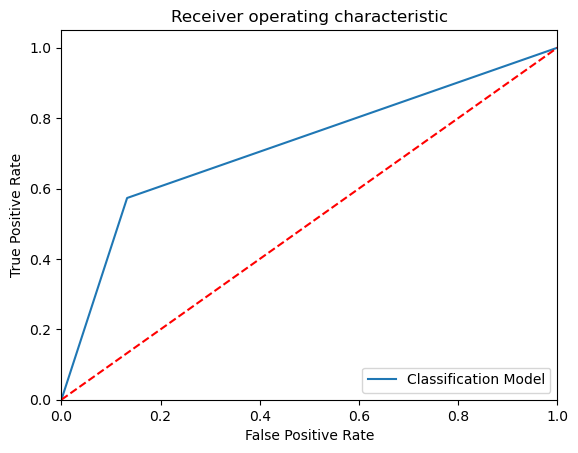

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 1342  2078]
 [  608 10625]]
Outcome values : 
 1342 2078 608 10625
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.39      0.50      3420
           0       0.84      0.95      0.89     11233

    accuracy                           0.82     14653
   macro avg       0.76      0.67      0.69     14653
weighted avg       0.80      0.82      0.80     14653

Accuracy : 81.7 %
Precision : 68.8 %
Recall : 39.2 %
F1 Score : 0.5
Specificity or True Negative Rate : 94.6 %
Balanced Accuracy : 66.9 %
MCC : 0.421
roc_auc_score: 0.669


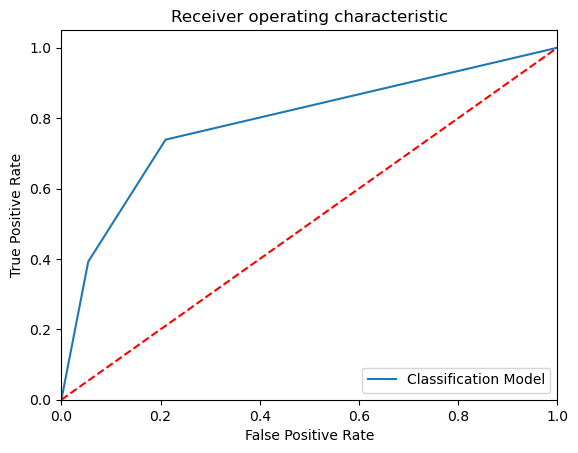

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 1966  1454]
 [ 1194 10039]]
Outcome values : 
 1966 1454 1194 10039
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.57      0.60      3420
           0       0.87      0.89      0.88     11233

    accuracy                           0.82     14653
   macro avg       0.75      0.73      0.74     14653
weighted avg       0.81      0.82      0.82     14653

Accuracy : 81.9 %
Precision : 62.2 %
Recall : 57.5 %
F1 Score : 0.598
Specificity or True Negative Rate : 89.4 %
Balanced Accuracy : 73.4 %
MCC : 0.482
roc_auc_score: 0.734


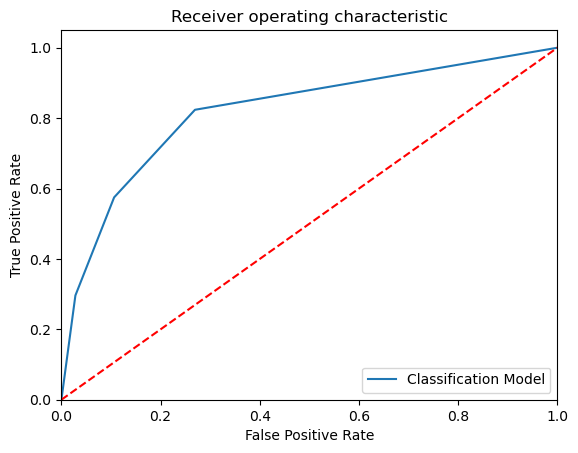

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 1591  1829]
 [  709 10524]]
Outcome values : 
 1591 1829 709 10524
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.47      0.56      3420
           0       0.85      0.94      0.89     11233

    accuracy                           0.83     14653
   macro avg       0.77      0.70      0.72     14653
weighted avg       0.81      0.83      0.81     14653

Accuracy : 82.7 %
Precision : 69.2 %
Recall : 46.5 %
F1 Score : 0.556
Specificity or True Negative Rate : 93.7 %
Balanced Accuracy : 70.1 %
MCC : 0.468
roc_auc_score: 0.701


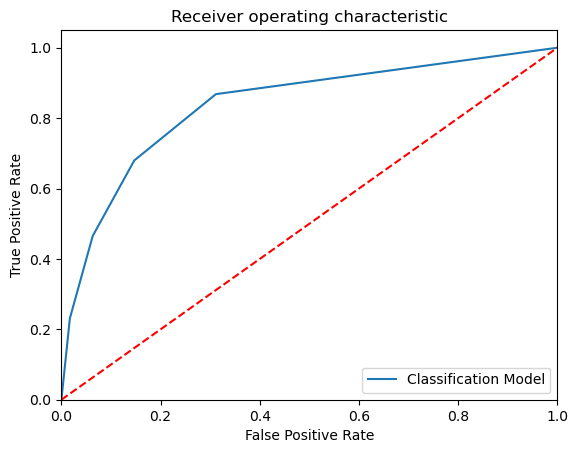

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 2011  1409]
 [ 1064 10169]]
Outcome values : 
 2011 1409 1064 10169
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.59      0.62      3420
           0       0.88      0.91      0.89     11233

    accuracy                           0.83     14653
   macro avg       0.77      0.75      0.76     14653
weighted avg       0.83      0.83      0.83     14653

Accuracy : 83.1 %
Precision : 65.4 %
Recall : 58.8 %
F1 Score : 0.619
Specificity or True Negative Rate : 90.5 %
Balanced Accuracy : 74.6 %
MCC : 0.512
roc_auc_score: 0.747


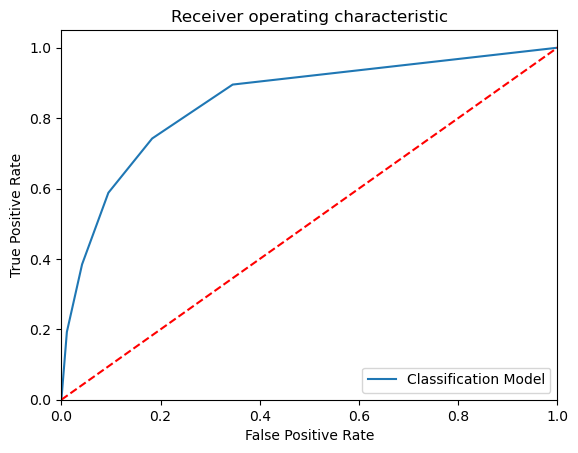

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[ 1735  1685]
 [  754 10479]]
Outcome values : 
 1735 1685 754 10479
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.51      0.59      3420
           0       0.86      0.93      0.90     11233

    accuracy                           0.83     14653
   macro avg       0.78      0.72      0.74     14653
weighted avg       0.82      0.83      0.82     14653

Accuracy : 83.4 %
Precision : 69.7 %
Recall : 50.7 %
F1 Score : 0.587
Specificity or True Negative Rate : 93.3 %
Balanced Accuracy : 72.0 %
MCC : 0.496
roc_auc_score: 0.72


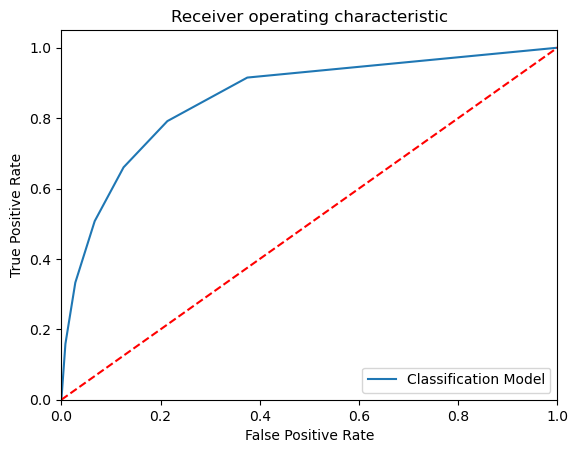

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[ 2006  1414]
 [ 1033 10200]]
Outcome values : 
 2006 1414 1033 10200
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.59      0.62      3420
           0       0.88      0.91      0.89     11233

    accuracy                           0.83     14653
   macro avg       0.77      0.75      0.76     14653
weighted avg       0.83      0.83      0.83     14653

Accuracy : 83.3 %
Precision : 66.0 %
Recall : 58.7 %
F1 Score : 0.621
Specificity or True Negative Rate : 90.8 %
Balanced Accuracy : 74.8 %
MCC : 0.516
roc_auc_score: 0.747


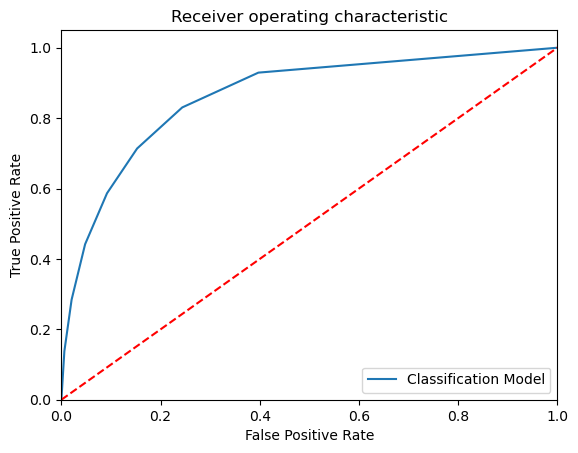

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[ 1795  1625]
 [  758 10475]]
Outcome values : 
 1795 1625 758 10475
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.52      0.60      3420
           0       0.87      0.93      0.90     11233

    accuracy                           0.84     14653
   macro avg       0.78      0.73      0.75     14653
weighted avg       0.83      0.84      0.83     14653

Accuracy : 83.7 %
Precision : 70.3 %
Recall : 52.5 %
F1 Score : 0.601
Specificity or True Negative Rate : 93.3 %
Balanced Accuracy : 72.9 %
MCC : 0.51
roc_auc_score: 0.729


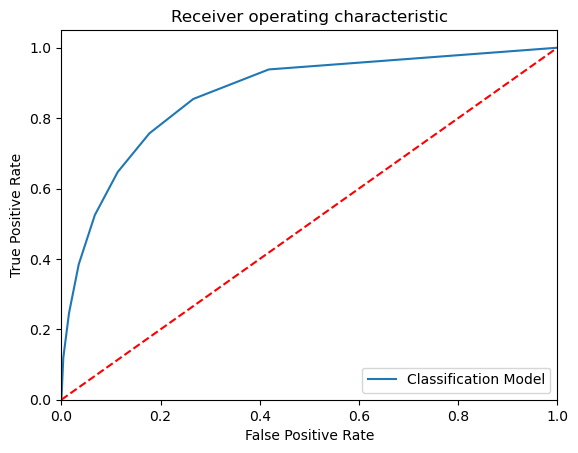

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[ 2011  1409]
 [  981 10252]]
Outcome values : 
 2011 1409 981 10252
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.59      0.63      3420
           0       0.88      0.91      0.90     11233

    accuracy                           0.84     14653
   macro avg       0.78      0.75      0.76     14653
weighted avg       0.83      0.84      0.83     14653

Accuracy : 83.7 %
Precision : 67.2 %
Recall : 58.8 %
F1 Score : 0.627
Specificity or True Negative Rate : 91.3 %
Balanced Accuracy : 75.0 %
MCC : 0.525
roc_auc_score: 0.75


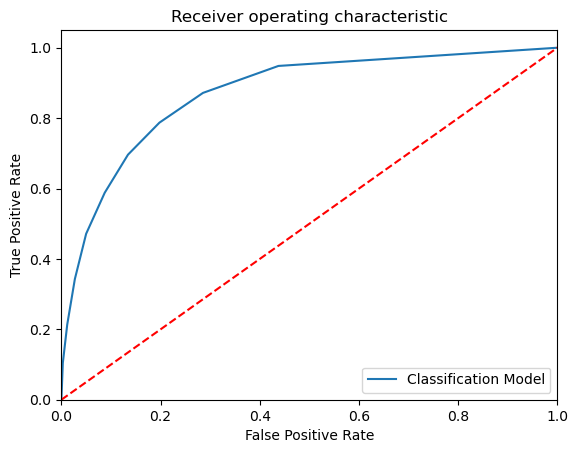

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[ 1834  1586]
 [  756 10477]]
Outcome values : 
 1834 1586 756 10477
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.54      0.61      3420
           0       0.87      0.93      0.90     11233

    accuracy                           0.84     14653
   macro avg       0.79      0.73      0.75     14653
weighted avg       0.83      0.84      0.83     14653

Accuracy : 84.0 %
Precision : 70.8 %
Recall : 53.6 %
F1 Score : 0.61
Specificity or True Negative Rate : 93.3 %
Balanced Accuracy : 73.4 %
MCC : 0.52
roc_auc_score: 0.734


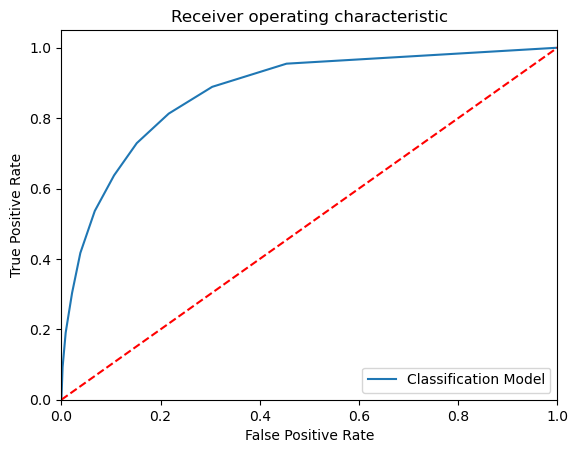

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[ 2009  1411]
 [  948 10285]]
Outcome values : 
 2009 1411 948 10285
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.59      0.63      3420
           0       0.88      0.92      0.90     11233

    accuracy                           0.84     14653
   macro avg       0.78      0.75      0.76     14653
weighted avg       0.83      0.84      0.83     14653

Accuracy : 83.9 %
Precision : 67.9 %
Recall : 58.7 %
F1 Score : 0.63
Specificity or True Negative Rate : 91.6 %
Balanced Accuracy : 75.2 %
MCC : 0.53
roc_auc_score: 0.752


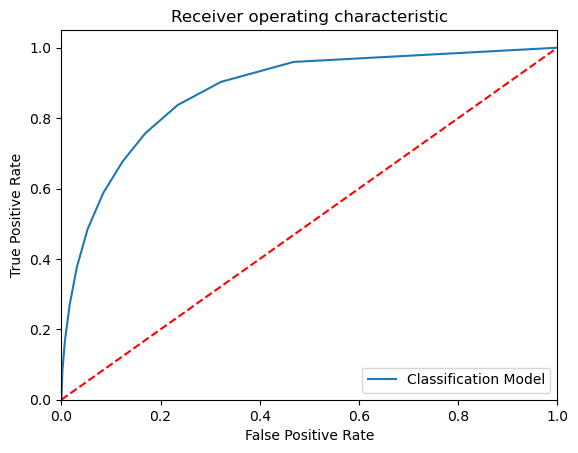

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[ 1853  1567]
 [  765 10468]]
Outcome values : 
 1853 1567 765 10468
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.54      0.61      3420
           0       0.87      0.93      0.90     11233

    accuracy                           0.84     14653
   macro avg       0.79      0.74      0.76     14653
weighted avg       0.83      0.84      0.83     14653

Accuracy : 84.1 %
Precision : 70.8 %
Recall : 54.2 %
F1 Score : 0.614
Specificity or True Negative Rate : 93.2 %
Balanced Accuracy : 73.7 %
MCC : 0.523
roc_auc_score: 0.737


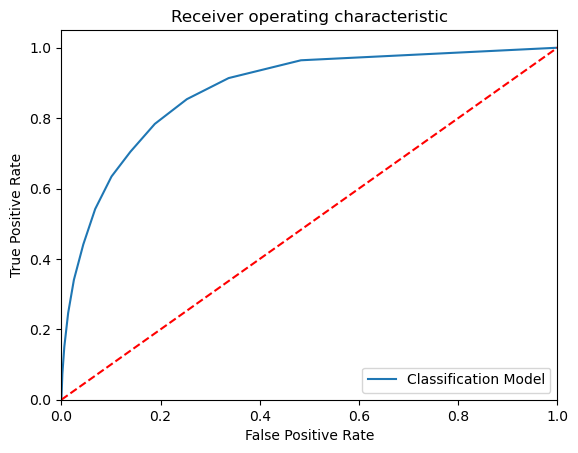

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[ 2000  1420]
 [  956 10277]]
Outcome values : 
 2000 1420 956 10277
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.58      0.63      3420
           0       0.88      0.91      0.90     11233

    accuracy                           0.84     14653
   macro avg       0.78      0.75      0.76     14653
weighted avg       0.83      0.84      0.83     14653

Accuracy : 83.8 %
Precision : 67.7 %
Recall : 58.5 %
F1 Score : 0.627
Specificity or True Negative Rate : 91.5 %
Balanced Accuracy : 75.0 %
MCC : 0.527
roc_auc_score: 0.75


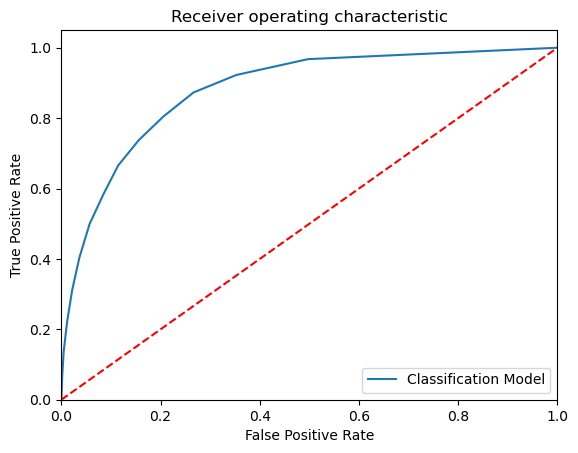

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[ 1856  1564]
 [  787 10446]]
Outcome values : 
 1856 1564 787 10446
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.54      0.61      3420
           0       0.87      0.93      0.90     11233

    accuracy                           0.84     14653
   macro avg       0.79      0.74      0.76     14653
weighted avg       0.83      0.84      0.83     14653

Accuracy : 84.0 %
Precision : 70.2 %
Recall : 54.3 %
F1 Score : 0.612
Specificity or True Negative Rate : 93.0 %
Balanced Accuracy : 73.6 %
MCC : 0.52
roc_auc_score: 0.736


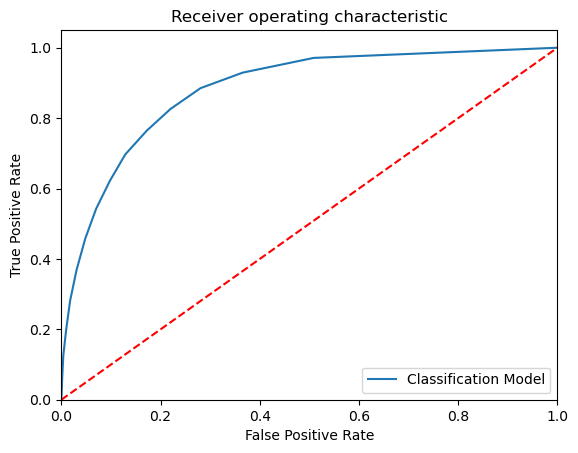

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[ 1988  1432]
 [  918 10315]]
Outcome values : 
 1988 1432 918 10315
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.58      0.63      3420
           0       0.88      0.92      0.90     11233

    accuracy                           0.84     14653
   macro avg       0.78      0.75      0.76     14653
weighted avg       0.83      0.84      0.83     14653

Accuracy : 84.0 %
Precision : 68.4 %
Recall : 58.1 %
F1 Score : 0.629
Specificity or True Negative Rate : 91.8 %
Balanced Accuracy : 75.0 %
MCC : 0.53
roc_auc_score: 0.75


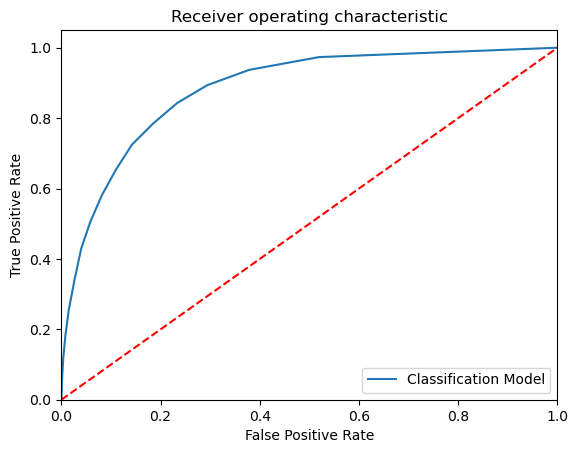

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[ 1871  1549]
 [  769 10464]]
Outcome values : 
 1871 1549 769 10464
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.55      0.62      3420
           0       0.87      0.93      0.90     11233

    accuracy                           0.84     14653
   macro avg       0.79      0.74      0.76     14653
weighted avg       0.83      0.84      0.83     14653

Accuracy : 84.2 %
Precision : 70.9 %
Recall : 54.7 %
F1 Score : 0.617
Specificity or True Negative Rate : 93.2 %
Balanced Accuracy : 74.0 %
MCC : 0.527
roc_auc_score: 0.739


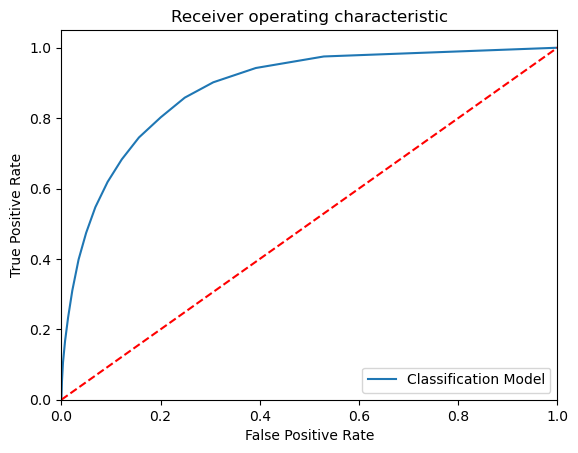

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[ 1981  1439]
 [  889 10344]]
Outcome values : 
 1981 1439 889 10344
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.58      0.63      3420
           0       0.88      0.92      0.90     11233

    accuracy                           0.84     14653
   macro avg       0.78      0.75      0.76     14653
weighted avg       0.83      0.84      0.84     14653

Accuracy : 84.1 %
Precision : 69.0 %
Recall : 57.9 %
F1 Score : 0.63
Specificity or True Negative Rate : 92.1 %
Balanced Accuracy : 75.0 %
MCC : 0.533
roc_auc_score: 0.75


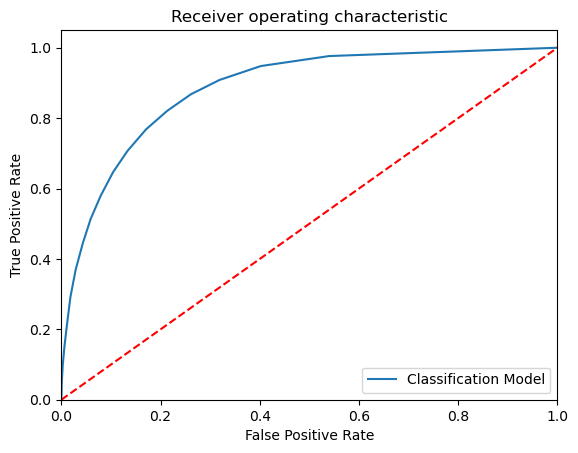

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[ 1877  1543]
 [  770 10463]]
Outcome values : 
 1877 1543 770 10463
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.55      0.62      3420
           0       0.87      0.93      0.90     11233

    accuracy                           0.84     14653
   macro avg       0.79      0.74      0.76     14653
weighted avg       0.83      0.84      0.83     14653

Accuracy : 84.2 %
Precision : 70.9 %
Recall : 54.9 %
F1 Score : 0.619
Specificity or True Negative Rate : 93.1 %
Balanced Accuracy : 74.0 %
MCC : 0.528
roc_auc_score: 0.74


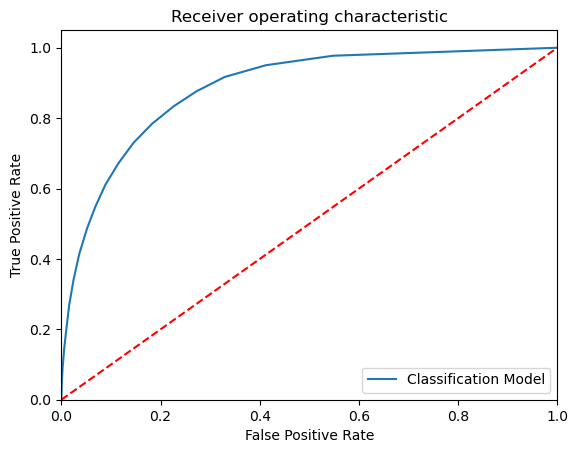

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[ 1983  1437]
 [  880 10353]]
Outcome values : 
 1983 1437 880 10353
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.58      0.63      3420
           0       0.88      0.92      0.90     11233

    accuracy                           0.84     14653
   macro avg       0.79      0.75      0.77     14653
weighted avg       0.83      0.84      0.84     14653

Accuracy : 84.2 %
Precision : 69.3 %
Recall : 58.0 %
F1 Score : 0.631
Specificity or True Negative Rate : 92.2 %
Balanced Accuracy : 75.1 %
MCC : 0.535
roc_auc_score: 0.751


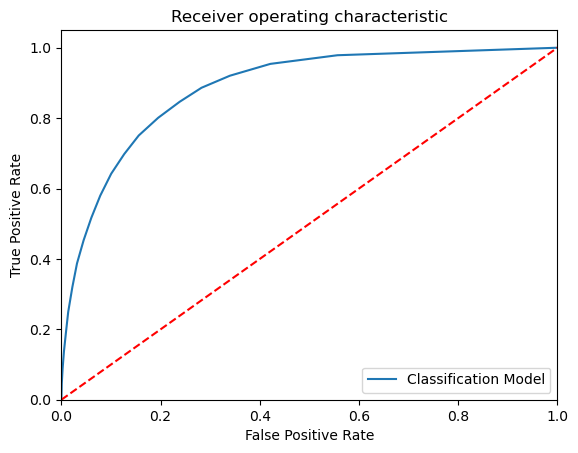

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[ 1878  1542]
 [  773 10460]]
Outcome values : 
 1878 1542 773 10460
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.55      0.62      3420
           0       0.87      0.93      0.90     11233

    accuracy                           0.84     14653
   macro avg       0.79      0.74      0.76     14653
weighted avg       0.83      0.84      0.83     14653

Accuracy : 84.2 %
Precision : 70.8 %
Recall : 54.9 %
F1 Score : 0.619
Specificity or True Negative Rate : 93.1 %
Balanced Accuracy : 74.0 %
MCC : 0.528
roc_auc_score: 0.74


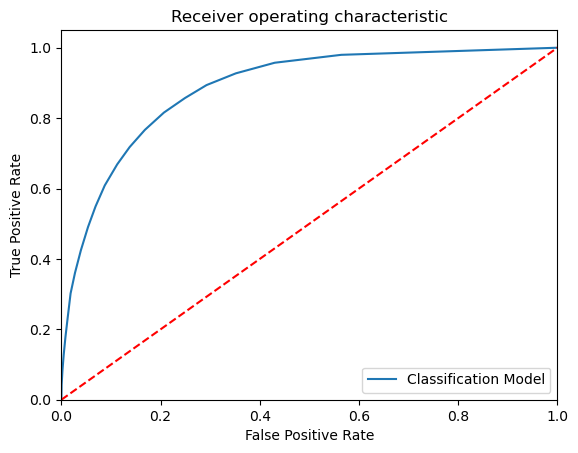

In [15]:

# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [16]:
KNN_Results

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,1960,1460,1488,9745,0.799,0.568,0.573,0.571,0.868,0.439,0.720316,0.720
1,KNeighborsClassifier(n_neighbors=2),2,1342,2078,608,10625,0.817,0.688,0.392,0.500,0.946,0.421,0.669136,0.669
2,KNeighborsClassifier(n_neighbors=3),3,1966,1454,1194,10039,0.819,0.622,0.575,0.598,0.894,0.482,0.734280,0.734
3,KNeighborsClassifier(n_neighbors=4),4,1591,1829,709,10524,0.827,0.692,0.465,0.556,0.937,0.468,0.701044,0.701
4,KNeighborsClassifier(),5,2011,1409,1064,10169,0.831,0.654,0.588,0.619,0.905,0.512,0.746645,0.746
5,KNeighborsClassifier(n_neighbors=6),6,1735,1685,754,10479,0.834,0.697,0.507,0.587,0.933,0.496,0.720093,0.720
6,KNeighborsClassifier(n_neighbors=7),7,2006,1414,1033,10200,0.833,0.660,0.587,0.621,0.908,0.516,0.747294,0.748
7,KNeighborsClassifier(n_neighbors=8),8,1795,1625,758,10475,0.837,0.703,0.525,0.601,0.933,0.510,0.728687,0.729
8,KNeighborsClassifier(n_neighbors=9),9,2011,1409,981,10252,0.837,0.672,0.588,0.627,0.913,0.525,0.750340,0.750
9,KNeighborsClassifier(n_neighbors=10),10,1834,1586,756,10477,0.840,0.708,0.536,0.610,0.933,0.520,0.734478,0.734


# Build the Calssification models and compare the results

Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 1517  1903]
 [  614 10619]]
Outcome values : 
 1517 1903 614 10619
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.44      0.55      3420
           0       0.85      0.95      0.89     11233

    accuracy                           0.83     14653
   macro avg       0.78      0.69      0.72     14653
weighted avg       0.82      0.83      0.81     14653

Accuracy : 82.8 %
Precision : 71.2 %
Recall : 44.4 %
F1 Score : 0.547
Specificity or True Negative Rate : 94.5 %
Balanced Accuracy : 69.4 %
MCC : 0.467
roc_auc_score: 0.694


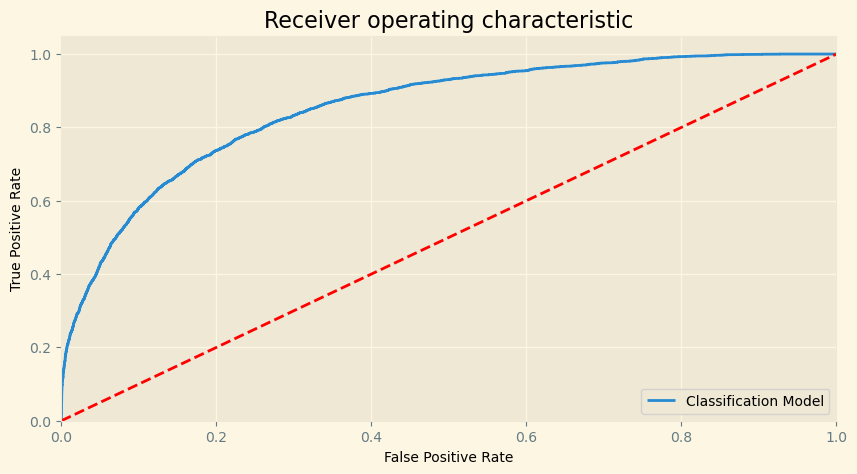

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[2150 1270]
 [1457 9776]]
Outcome values : 
 2150 1270 1457 9776
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.63      0.61      3420
           0       0.89      0.87      0.88     11233

    accuracy                           0.81     14653
   macro avg       0.74      0.75      0.74     14653
weighted avg       0.82      0.81      0.82     14653

Accuracy : 81.4 %
Precision : 59.6 %
Recall : 62.9 %
F1 Score : 0.612
Specificity or True Negative Rate : 87.0 %
Balanced Accuracy : 75.0 %
MCC : 0.49
roc_auc_score: 0.749


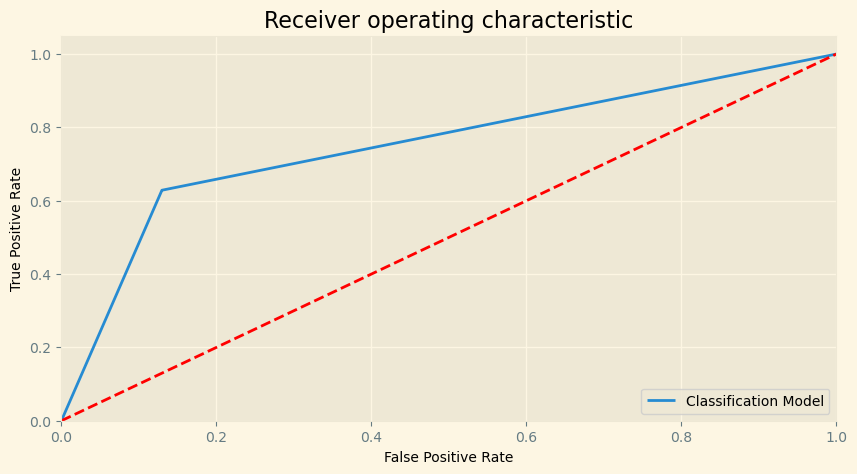

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 2172  1248]
 [  780 10453]]
Outcome values : 
 2172 1248 780 10453
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.64      0.68      3420
           0       0.89      0.93      0.91     11233

    accuracy                           0.86     14653
   macro avg       0.81      0.78      0.80     14653
weighted avg       0.86      0.86      0.86     14653

Accuracy : 86.2 %
Precision : 73.6 %
Recall : 63.5 %
F1 Score : 0.682
Specificity or True Negative Rate : 93.1 %
Balanced Accuracy : 78.3 %
MCC : 0.597
roc_auc_score: 0.783


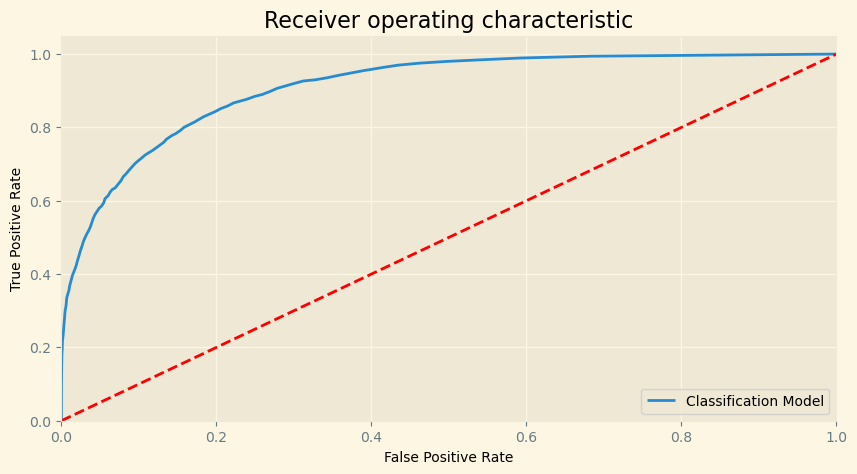

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 2138  1282]
 [  928 10305]]
Outcome values : 
 2138 1282 928 10305
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.63      0.66      3420
           0       0.89      0.92      0.90     11233

    accuracy                           0.85     14653
   macro avg       0.79      0.77      0.78     14653
weighted avg       0.84      0.85      0.85     14653

Accuracy : 84.9 %
Precision : 69.7 %
Recall : 62.5 %
F1 Score : 0.659
Specificity or True Negative Rate : 91.7 %
Balanced Accuracy : 77.1 %
MCC : 0.564
roc_auc_score: 0.771


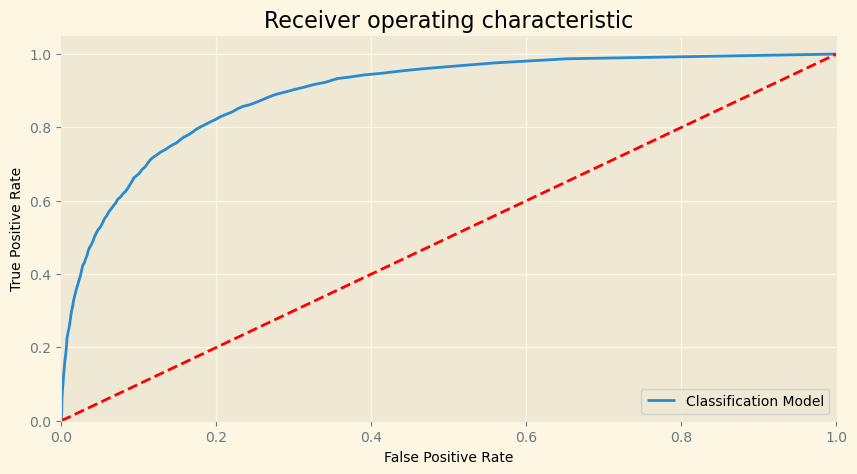

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 1342  2078]
 [  608 10625]]
Outcome values : 
 1342 2078 608 10625
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.39      0.50      3420
           0       0.84      0.95      0.89     11233

    accuracy                           0.82     14653
   macro avg       0.76      0.67      0.69     14653
weighted avg       0.80      0.82      0.80     14653

Accuracy : 81.7 %
Precision : 68.8 %
Recall : 39.2 %
F1 Score : 0.5
Specificity or True Negative Rate : 94.6 %
Balanced Accuracy : 66.9 %
MCC : 0.421
roc_auc_score: 0.669


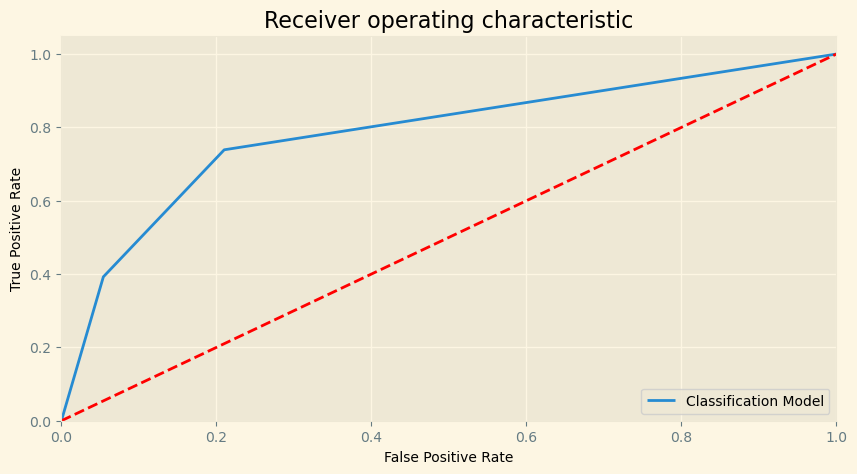

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 1130  2290]
 [  530 10703]]
Outcome values : 
 1130 2290 530 10703
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.33      0.44      3420
           0       0.82      0.95      0.88     11233

    accuracy                           0.81     14653
   macro avg       0.75      0.64      0.66     14653
weighted avg       0.79      0.81      0.78     14653

Accuracy : 80.8 %
Precision : 68.1 %
Recall : 33.0 %
F1 Score : 0.445
Specificity or True Negative Rate : 95.3 %
Balanced Accuracy : 64.2 %
MCC : 0.378
roc_auc_score: 0.642


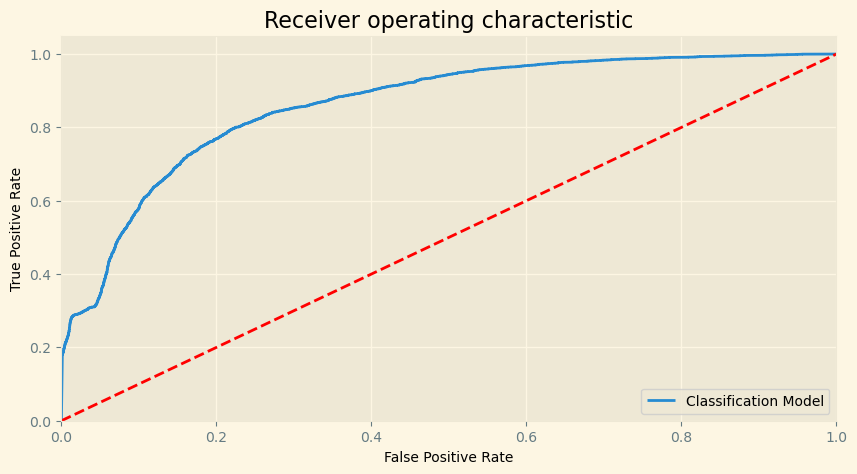

-----------------------------------------------------------------------------------------------------


In [32]:

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=2)
ModelSVM = SVC(kernel='poly', random_state = 42, class_weight='balanced', probability=True)
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN,  ModelGNB]
for models in MM:

    # Fit the model

    models.fit(x_train, y_train)

    # Prediction

    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # Print the model name

    print('Model Name: ', models)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [33]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),1517,1903,614,10619,0.828,0.712,0.444,0.547,0.945,0.467,0.694453,0.694
1,DecisionTreeClassifier(),2150,1270,1457,9776,0.814,0.596,0.629,0.612,0.870,0.490,0.749474,0.750
2,"(DecisionTreeClassifier(max_features='sqrt', r...",2172,1248,780,10453,0.862,0.736,0.635,0.682,0.931,0.597,0.782825,0.783
3,"(ExtraTreeClassifier(random_state=1710062733),...",2138,1282,928,10305,0.849,0.697,0.625,0.659,0.917,0.564,0.771266,0.771
4,KNeighborsClassifier(n_neighbors=2),1342,2078,608,10625,0.817,0.688,0.392,0.500,0.946,0.421,0.669136,0.669
5,GaussianNB(),1130,2290,530,10703,0.808,0.681,0.330,0.445,0.953,0.378,0.641613,0.642


# Random Forest

In [19]:
#to buildthe 'random forest' model with random sampling
from sklearn.ensemble import RandomForestClassifier
#create model object
model = RandomForestClassifier()
model.fit(x_train,y_train)


y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)

Training Accuracy : 0.9999122524788675
Testing Accuracy : 0.864123387702177


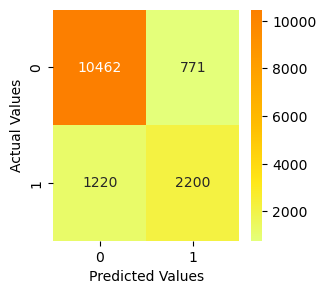

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns 

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [21]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)


Confusion matrix : 
 [[ 2200  1220]
 [  771 10462]]


In [22]:
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 2200 1220 771 10462


In [23]:
# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)



Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.64      0.69      3420
           0       0.90      0.93      0.91     11233

    accuracy                           0.86     14653
   macro avg       0.82      0.79      0.80     14653
weighted avg       0.86      0.86      0.86     14653



In [24]:

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);

precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);



Accuracy : 86.4 %
Precision : 74.0 %
Recall : 64.3 %
F1 Score : 0.688
Specificity or True Negative Rate : 93.1 %
Balanced Accuracy : 78.7 %
MCC : 0.605
roc_auc_score: 0.787


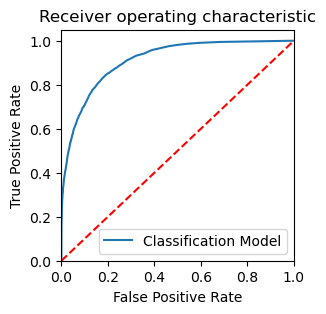

In [25]:
from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)


#area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))




# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, model.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [35]:
Results = pd.DataFrame({'income_A': y_test, 'income_B': y_pred})
ResultsFinal = Aodata_BK1.merge(Results, left_index = True, right_index = True)
ResultsFinal.sample(5)

,x,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_A,income_B
21796,21797,21,State-gov,140764,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,12,United-States,<=50K,0,0
39395,39396,19,Private,167149,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,25,United-States,<=50K,0,0
2943,2944,48,Private,165484,Bachelors,13,Separated,Sales,Not-in-family,White,Male,0,0,65,United-States,>50K,1,0
41314,41315,37,Private,122493,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,45,United-States,<=50K,0,0
44966,44967,36,Private,172129,9th,5,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K,0,0
